# Local Group Satellites - Encylopaedia of Astrophysics

This notebook contains all the code and links to databases required for reproducing (and updating) the figures in the Chapter of Local Group Satellites in the Encylopaedia of Astrophysics.

In [6]:
"""
Import libraries and functions required for reproducing all figures,
as well as style commands.
"""
###------------------------------------------------
# Imports
###------------------------------------------------

import numpy as np
from astropy.coordinates import SkyCoord
import matplotlib.pylab as plt
from astropy.table import Table
import astropy.units as u
from astropy.io import fits
from astropy.io import ascii
import pandas as pd
from importlib import reload 
import m31_frame as m31_frame

###------------------------------------------------
# Define plot style
###------------------------------------------------

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

fsize = 18
tsize = 15
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 1.8
lhandle = 2.0

plt.style.use('default')
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['text.usetex']=True
plt.rcParams['xtick.minor.visible'], plt.rcParams['xtick.top'] = True,True
plt.rcParams['ytick.minor.visible'], plt.rcParams['ytick.right'] = True,True
plt.rcParams['xtick.direction'], plt.rcParams['ytick.direction'] = 'in','in' 

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rcParams['xtick.direction'], plt.rcParams['ytick.direction'] = 'in','in' 


left = b1 = 0.15
width = 0.75
h1 = 0.75
height = 0.75

In [7]:
###------------------------------------------------
# Access local_volume_database 
# https://github.com/michellelmc/local_volume_database/tree/main
###------------------------------------------------


# Load satellite data from local_volume_database on github

data_mw = pd.read_csv('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_mw.csv')
data_m31 = pd.read_csv('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_m31.csv')


# Carve out confirmed vs candidate

mw = (data_mw.host == 'mw') & (data_mw.confirmed_dwarf ==1)
mw_c = (data_mw.host == 'mw') & (data_mw.confirmed_dwarf ==0)
lmc = (data_mw.host == 'lmc') & (data_mw.confirmed_dwarf ==1)
lmc_c = (data_mw.host == 'lmc') & (data_mw.confirmed_dwarf ==0)
m31 = (data_m31.host == 'm_031') & (data_m31.confirmed_dwarf ==1)
m31_c = (data_m31.host == 'm_031') & (data_m31.confirmed_dwarf ==0)
m33 = (data_m31.host == 'm_033') & (data_m31.confirmed_dwarf ==1)
m33_c = (data_m31.host == 'm_033') & (data_m31.confirmed_dwarf ==0)

In [9]:
###------------------------------------------------
# MW dwarf & candidate properties
###------------------------------------------------

# Confirmed dwarfs
mv_g = data_mw.M_V[mw].values
n_g= data_mw.name[mw].values
dm_g = data_mw.distance_modulus[mw].values
dmeg_u = data_mw.distance_modulus_ep[mw].values
dmeg_d = data_mw.distance_modulus_ep[mw].values
dist_g = 10**((dm_g+5)/5)
dist_g_eu = 10**((dm_g+dmeg_u+5)/5)- 10**((dm_g+5)/5)
dist_g_ed = 10**((dm_g+5)/5)- 10**((dm_g-dmeg_d+5)/5)
c_g = SkyCoord(data_mw.ra[mw].values,data_mw.dec[mw].values, distance = dist_g, unit= (u.deg, u.deg, u.pc))

rh_g = data_mw.rhalf[mw].values * dist_g/60/180*np.pi
rheu_g = data_mw.rhalf_ep[mw] * dist_g/60/180*np.pi
rhed_g = data_mw.rhalf_em[mw] * dist_g /60/180*np.pi

feh_g = data_mw.metallicity_spectroscopic[mw].values
feh_g_eu = data_mw.metallicity_spectroscopic_ep[mw].values
feh_g_ed = data_mw.metallicity_spectroscopic_ep[mw].values

sv_g = data_mw.vlos_sigma[mw] 
sved_g = data_mw.vlos_sigma_em[mw]  
sveu_g = data_mw.vlos_sigma_ep[mw]


mh_g = 580*rh_g*sv_g**2
mheu_g = mh_g*(2*(sveu_g/sv_g)**2+(rheu_g/rh_g**2))
mhed_g = mh_g*(2*(sved_g/sv_g)**2+(rhed_g/rh_g**2))

l_g = 10**(-0.4*(mv_g-4.83))

# Candidate dwarfs

mv_gc = data_mw.M_V[mw_c].values
n_gc= data_mw.name[mw_c].values
dm_gc = data_mw.distance_modulus[mw_c].values
dmegc_u = data_mw.distance_modulus_ep[mw_c].values
dmegc_d = data_mw.distance_modulus_ep[mw_c].values
dist_gc = 10**((dm_gc+5)/5)
dist_gc_eu = 10**((dm_gc+dmegc_u+5)/5)- 10**((dm_gc+5)/5)
dist_gc_ed = 10**((dm_gc+5)/5)- 10**((dm_gc-dmegc_d+5)/5)
c_gc = SkyCoord(data_mw.ra[mw_c].values,data_mw.dec[mw_c].values, distance = dist_gc, unit= (u.deg, u.deg, u.pc))

rh_gc = data_mw.rhalf[mw_c].values * dist_gc/60/180*np.pi
rheu_gc = data_mw.rhalf_ep[mw_c] * dist_gc/60/180*np.pi
rhed_gc = data_mw.rhalf_em[mw_c] * dist_gc/60/180*np.pi

feh_gc = data_mw.metallicity_spectroscopic[mw_c].values
feh_gc_eu = data_mw.metallicity_spectroscopic_ep[mw_c].values
feh_gc_ed = data_mw.metallicity_spectroscopic_ep[mw_c].values
l_gc = 10**(-0.4*(mv_gc-4.83))

###------------------------------------------------
# LMC galaxy properties
###------------------------------------------------

mv_l = data_mw.M_V[lmc].values
n_l= data_mw.name[lmc].values
dm_l = data_mw.distance_modulus[lmc].values
dmel_u = data_mw.distance_modulus_ep[lmc].values
dmel_d = data_mw.distance_modulus_ep[lmc].values
dist_l = 10**((dm_l+5)/5)
dist_l_eu = 10**((dm_l+dmel_u+5)/5)- 10**((dm_l+5)/5)
dist_l_ed = 10**((dm_l+5)/5)- 10**((dm_l-dmel_d+5)/5)
c_l = SkyCoord(data_mw.ra[lmc].values,data_mw.dec[lmc].values, distance = dist_l, unit= (u.deg, u.deg, u.pc))

rh_l = data_mw.rhalf[lmc].values * dist_l/60/180*np.pi
rheu_l = data_mw.rhalf_ep[lmc] * dist_l/60/180*np.pi
rhed_l = data_mw.rhalf_em[lmc] * dist_l /60/180*np.pi

feh_l = data_mw.metallicity_spectroscopic[lmc].values
feh_l_eu = data_mw.metallicity_spectroscopic_ep[lmc].values
feh_l_ed = data_mw.metallicity_spectroscopic_ep[lmc].values


###------------------------------------------------
# M31 galaxy properties
###------------------------------------------------

mv_m31 = data_m31.M_V[m31].values
n_m31= data_m31.name[m31].values
dm_m31 = data_m31.distance_modulus[m31].values
dme_u = data_m31.distance_modulus_ep[m31].values
dme_d = data_m31.distance_modulus_ep[m31].values
dist_m31 = 10**((dm_m31+5)/5)
dist_m31_eu = 10**((dm_m31+dme_u+5)/5)- 10**((dm_m31+5)/5)
dist_m31_ed = 10**((dm_m31+5)/5)- 10**((dm_m31-dme_d+5)/5)
c_a = SkyCoord(data_m31.ra[m31].values,data_m31.dec[m31].values, unit= (u.deg, u.deg))

rh_m31 = data_m31.rhalf[m31].values *dist_m31/60/180*np.pi
rheu_m31 = data_m31.rhalf_ep[m31]*dist_m31/60/180*np.pi
rhed_m31 = data_m31.rhalf_em[m31]*dist_m31/60/180*np.pi

feh_m31 = data_m31.metallicity_spectroscopic[m31].values
feh_g_m31 = data_m31.metallicity_spectroscopic_ep[m31].values
feh_g_m31 = data_m31.metallicity_spectroscopic_ep[m31].values

sv_m31 = data_m31.vlos_sigma[m31] 
sved_m31 = data_m31.vlos_sigma_em[m31]  
sveu_m31 = data_m31.vlos_sigma_ep[m31]


mh_m31 = 580*rh_m31*sv_m31**2
mheu_m31 = mh_m31*(2*(sveu_m31/sv_m31)**2+(rheu_m31/rh_m31**2))
mhed_m31 = mh_m31*(2*(sved_m31/sv_m31)**2+(rhed_m31/rh_m31**2))

l_m31 = 10**(-0.4*(mv_m31-4.83))

###------------------------------------------------
# M33 galaxy properties
###------------------------------------------------

mv_m33 = data_m31.M_V[m33].values
n_m33= data_m31.name[m33].values
dm_m33 = data_m31.distance_modulus[m33].values
dmem33_u = data_m31.distance_modulus_ep[m33].values
dmem33_d = data_m31.distance_modulus_ep[m33].values
dist_m33 = 10**((dm_m33+5)/5)
dist_m33_eu = 10**((dm_m33+dmem33_u+5)/5)- 10**((dm_m33+5)/5)
dist_m33_ed = 10**((dm_m33+5)/5)- 10**((dm_m33-dmem33_d+5)/5)
c_m33 = SkyCoord(data_m31.ra[m33].values,data_m31.dec[m33].values, unit= (u.deg, u.deg))

rh_m33 = data_m31.rhalf[m33].values *dist_m33/60/180*np.pi
rheu_m33 = data_m31.rhalf_ep[m33]*dist_m33/60/180*np.pi
rhed_m33 = data_m31.rhalf_em[m33]*dist_m33/60/180*np.pi



# Load the discovery years for all satellites - not divided between smaller subgroups

discovery = pd.read_csv("https://raw.githubusercontent.com/apace7/local_volume_database/main/old_data/name_discovery.csv")

mw_dy = discovery[discovery['table']=='dwarf_mw'].discovery_year
m31_dy = discovery[discovery['table']=='dwarf_m31'].discovery_year

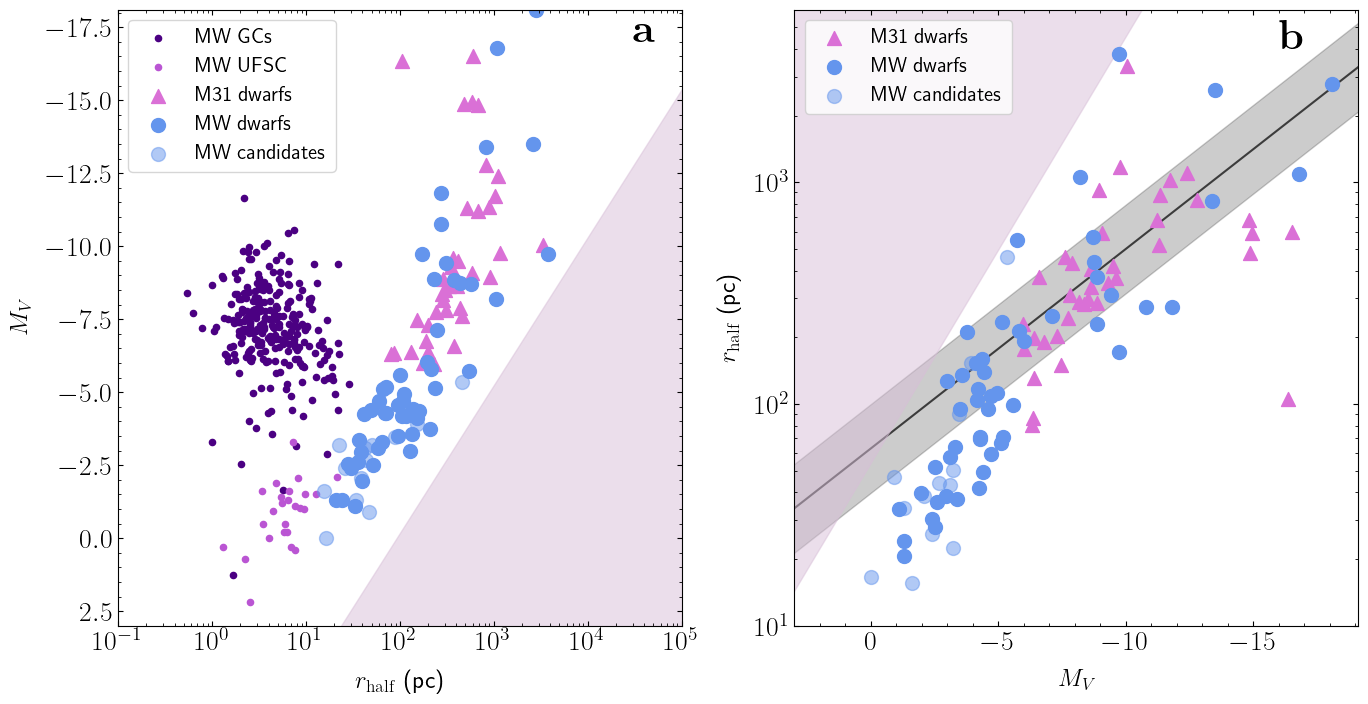

In [10]:
###------------------------------------------------
# Figure 1a,b - Size-Mv including other systems
###------------------------------------------------

# Need to include GCs: Harris catalogue plus ultra-faint star clusters and disk clusters detected since

data_ufsc = pd.read_csv('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_ambiguous.csv')
data_gc_disk = pd.read_csv('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_dwarf_hosted.csv')
data_gc_harris = pd.read_csv('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_harris.csv')

mv_gch = data_gc_harris.M_V.values
rh_gch = data_gc_harris.rhalf_physical.values

mv_gcd = data_gc_disk.M_V.values
rh_gcd = data_gc_disk.rhalf_physical.values

mv_ufsc = data_ufsc.M_V.values
rh_ufsc = data_ufsc.rhalf_physical.values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1.set_xscale('log')
ax1.set_xlabel(r'$r_{\rm half}$ (pc)',labelpad=10)
ax1.set_ylabel(r'$M_V$',labelpad=10)
ax1.set_ylim(3,-18.1)
ax1.set_xlim(0.1,1e5)
x = np.logspace(0.1,5.5,100)
y = -2.2 * np.log(x)+10
y2 = np.zeros(100)+1e6
ax1.fill_between(x,y,y2, color = 'thistle', alpha = 0.5)

ax1.scatter(rh_gch, mv_gch, marker = 'o', s=20, c = 'indigo', label = 'MW GCs' )
ax1.scatter(rh_gcd, mv_gcd, marker = 'o', s=20, c = 'indigo')
ax1.scatter(rh_ufsc, mv_ufsc, marker = 'o', s=20, c = 'mediumorchid',label='MW UFSC')

ax1.scatter(rh_m31, mv_m31,marker = '^', s=100, c = 'orchid',label = 'M31 dwarfs')
ax1.scatter(rh_m33, mv_m33, marker = '^', s=100, c = 'orchid')
ax1.scatter(rh_g, mv_g,marker = 'o', s=100, c = 'cornflowerblue', label = 'MW dwarfs')
ax1.scatter(rh_gc, mv_gc, marker = 'o', s=100, c = 'cornflowerblue', alpha=0.5, label = 'MW candidates')
ax1.scatter(rh_l, mv_l,marker = 'o', s=100, c = 'cornflowerblue')

ax1.legend()

ax2.set_yscale('log')
ax2.set_xlim(3,-19.1)
ax2.set_ylim(10,6e3)
ax2.set_ylabel(r'$r_{\rm half}$ (pc)',labelpad=10)
ax2.set_xlabel(r'$M_V$',labelpad=10)
x = np.linspace(-19.1,3.5,100)
ydn = 10**((x-9)/(-5.2))
yup = 1e4
ax2.fill_between(x,ydn,yup, color = 'thistle', alpha = 0.5)


ax2.scatter(mv_m31,rh_m31,marker = '^', s=100, c = 'orchid',label = 'M31 dwarfs')
ax2.scatter(mv_m33, rh_m33, marker = '^', s=100, c = 'orchid')
ax2.scatter(mv_g,rh_g, marker = 'o', s=100, c = 'cornflowerblue', label = 'MW dwarfs')
ax2.scatter(mv_gc, rh_gc, marker = 'o', s=100, c = 'cornflowerblue', alpha=0.5, label = 'MW candidates')
ax2.scatter(mv_l,rh_l, marker = 'o', s=100, c = 'cornflowerblue')

ax2.legend()

# Include Brasseur relation (and then update to fit)

def mvrh(mv,zp,s):
    y = 10**(zp+s*(mv+6.0))
    return y

x = np.arange(-19.5,4,0.1)
y = mvrh(x,2.34,-0.09)
yup = mvrh(x,2.34+0.2,-0.09)
ydn = mvrh(x,2.34-0.2,-0.09)

ax2.plot(x,y, zorder = 0, c = 'k', alpha = 0.7)
ax2.fill_between(x,ydn,yup, color='k', alpha = 0.2, zorder=0)

ax1.text(3e4,-17,r'\bf a', fontsize = 30)
ax2.text(-16,4e3,r'\bf b', fontsize = 30)


plt.savefig('rh_mv_double.pdf', bbox_inches='tight')



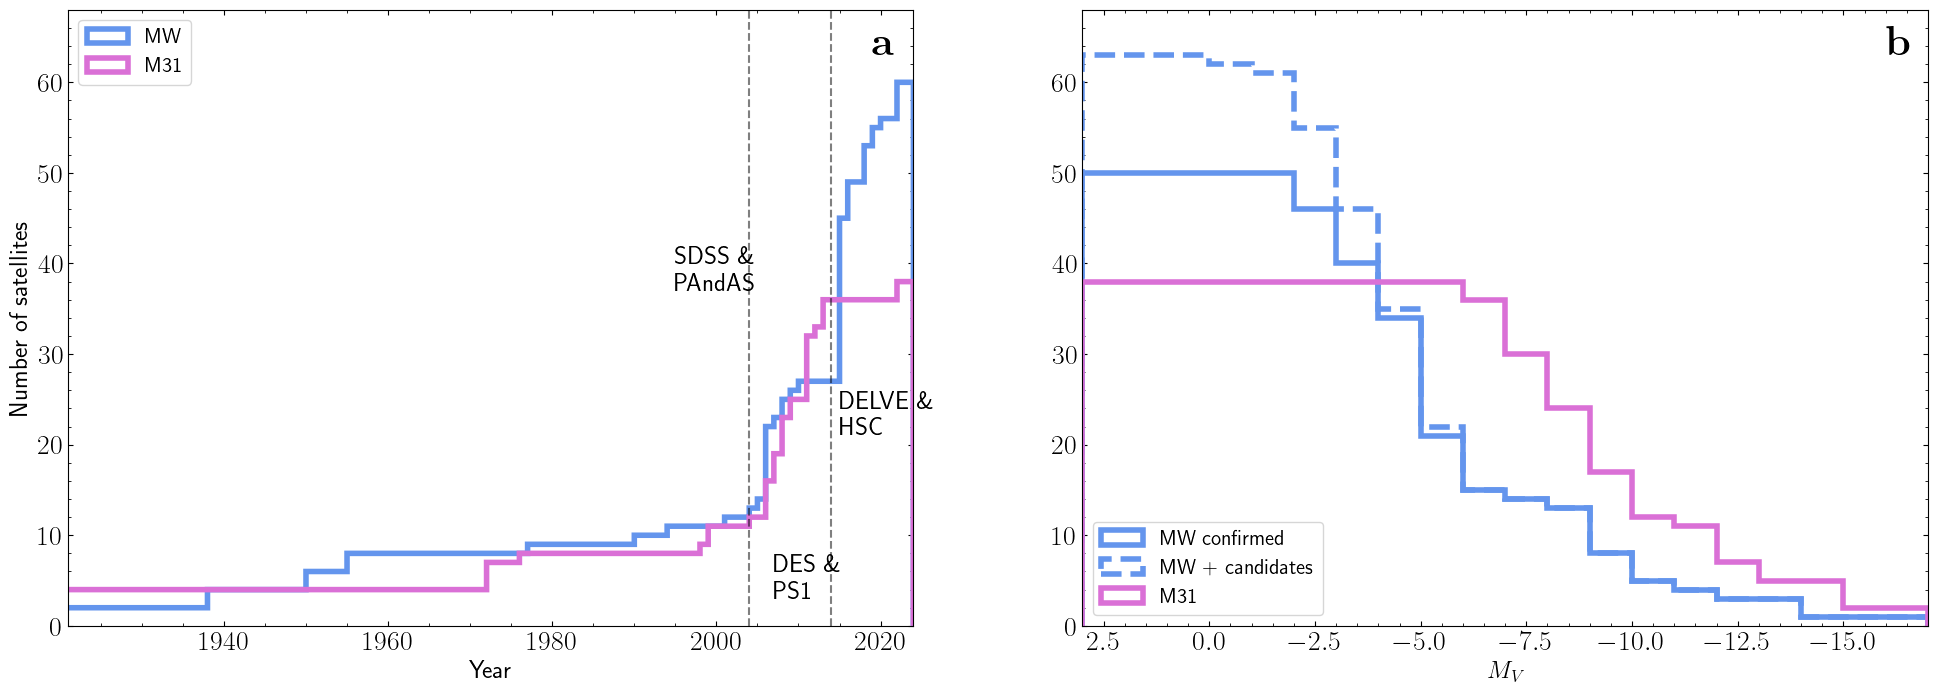

In [16]:
###------------------------------------------------
# Figure 2a,b - discovery as a function of time & LF
###------------------------------------------------
figx = 24
figy = 8

fig= plt.figure(figsize=(figx,figy))

gs = fig.add_gridspec(1,2,hspace=0)
ax1 = plt.subplot(gs[-1, :-1])
ax2 = plt.subplot(gs[-1, -1])


#plt.figure(figsize=(8,5))
ax1.hist(mw_dy, bins = np.arange(0,2025,1), histtype = 'step', cumulative=True, lw = 4, edgecolor = 'cornflowerblue', label = 'MW')
ax1.hist(m31_dy, bins = np.arange(0,2025,1), histtype = 'step', cumulative=True, lw = 4, edgecolor = 'orchid', label = 'M31')
ax1.set_xlim(1921,2024)
ax1.set_ylim(0,68)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of satellites")
ax1.axvline(2004,ls = '--', c='k', alpha = 0.5)
ax1.axvline(2014,ls = '--', c='k', alpha = 0.5)
#plt.text(2007,6,"Start of PAndAS", fontsize = 10)
ax1.text(1995,40,r"SDSS \&", fontsize = 18)
ax1.text(1995,37,"PAndAS", fontsize = 18)

ax1.text(2007,6,r"DES \& ", fontsize = 18)
ax1.text(2007,3,"PS1", fontsize = 18)

ax1.text(2015,24,r"DELVE \& ", fontsize = 18)
ax1.text(2015,21,"HSC", fontsize = 18)

mvmw = np.concatenate((mv_g, mv_l))
mvmwc = np.concatenate((mv_g, mv_gc, mv_l))
mvm31 = np.concatenate((mv_m31, mv_m33))

ax1.legend()

#ax2.label_outer()    
#ax2.yaxis.set_label_position("right")
#ax2.yaxis.tick_right()
ax2.set_xlim(3,-17)
ax2.set_ylim(0,68)
ax2.set_xlabel(r"$M_V$")

ax2.hist(mvmw, bins = np.arange(-17,4), histtype = 'step',cumulative=True, lw = 4, edgecolor = 'cornflowerblue', label = 'MW confirmed')
ax2.hist(mvmwc, bins = np.arange(-17,4), histtype = 'step', cumulative=True, lw = 4, edgecolor = 'cornflowerblue', ls = '--',label = 'MW + candidates')
ax2.hist(mvm31, bins = np.arange(-17,4), histtype = 'step',cumulative=True, lw = 4, edgecolor = 'orchid', label = 'M31')

ax2.legend()

ax1.text(2019,63,r'\bf a', fontsize = 30)
ax2.text(-16,63,r'\bf b', fontsize = 30)


plt.savefig("Discoveries_satellites.pdf")


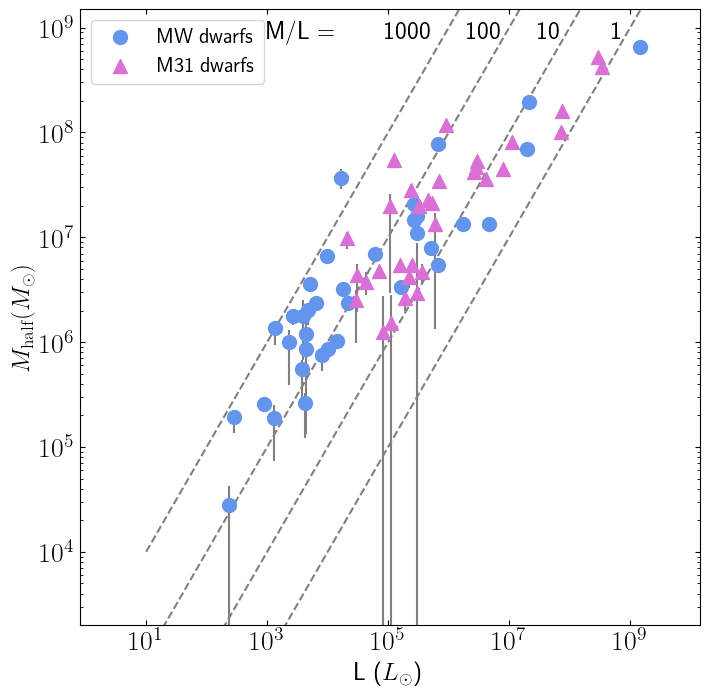

In [14]:
###------------------------------------------------
# Figure 3 - Mass-Luminosity relation
###------------------------------------------------


plt.figure(figsize=(8,8))
plt.yscale('log')
plt.xscale('log')
plt.ylim(2e3,1.5e9)


plt.errorbar(l_g, mh_g, yerr = [mheu_g, mhed_g],fmt='none', ecolor='0.5', capsize=None, zorder = 0)
plt.errorbar(l_m31, mh_m31, yerr = [mheu_m31, mhed_m31],fmt='none', ecolor='0.5', capsize=None, zorder = 0)
plt.scatter(l_g, mh_g,marker = 'o', s=100, c = 'cornflowerblue', label = 'MW dwarfs')
#plt.scatter(l_gc,mass_gc,marker = 'o', s=100, c = 'cornflowerblue', alpha=0.5, label = 'MW candidates')
plt.scatter(l_m31,mh_m31,marker = '^', s=100, c = 'orchid',label = 'M31 dwarfs')
plt.xlabel(r"L ($L_\odot$)")
plt.ylabel(r"$M_{\rm half} (M_\odot)$")

plt.plot(x,x,ls = '--', c = '0.5', zorder=0)
plt.plot(x,x*10,ls = '--', c = '0.5', zorder=0)
plt.plot(x,x*100,ls = '--', c = '0.5', zorder=0)
plt.plot(x,x*1000,ls = '--', c = '0.5', zorder=0)

plt.text(1e3, 8e8,r'M/L =')
plt.text(9e4, 8e8,'1000')
plt.text(2e6, 8e8,'100')
plt.text(3e7, 8e8,'10')
plt.text(5e8, 8e8,'1')

plt.legend()

plt.savefig('ML_satellites.pdf')


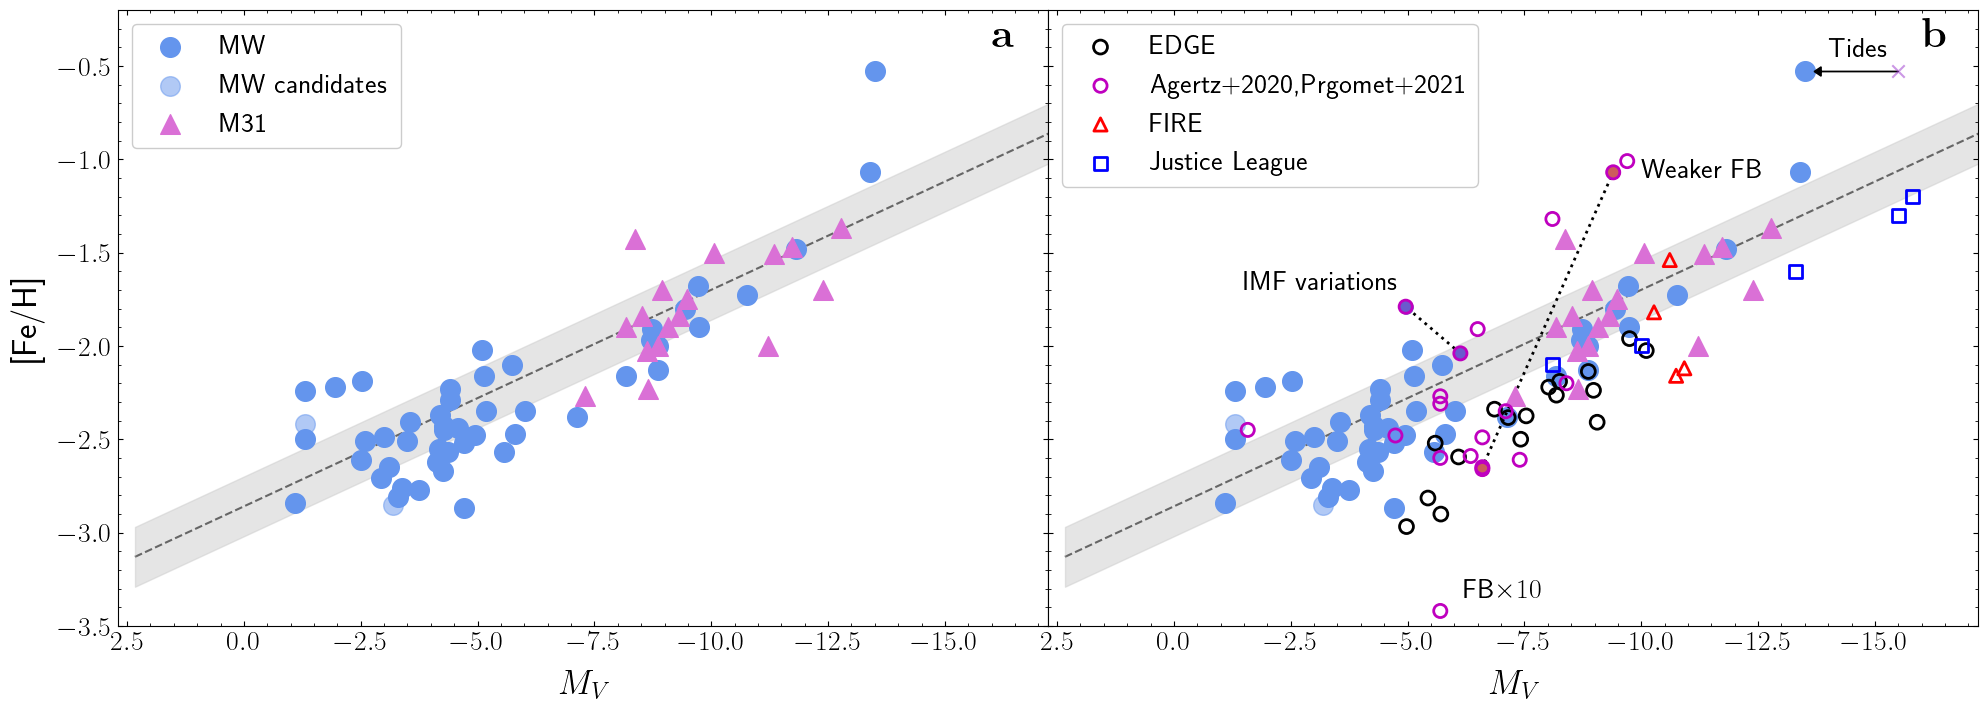

In [12]:
###------------------------------------------------
# Figure 4 - Mass-metallicity relation
###------------------------------------------------


xmin = 7.8
xmax = 10.5
ymin = 0.0
ymax = 1.0
xmin2 = 6
xmax2 = 9
ymin2 = 0.0
ymax2 = 320
xmin3 = 6
xmax3 = 9
ymin3 = 0.0
ymax3 = 110.0

figx = 24
figy = 8
myfontsize = 25
mylegendfontsize = 20
mylinewidth = 3
mymarkersize = 12


#fig=plt.figure(figsize=(8,6))
fig= plt.figure(figsize=(figx,figy))

gs = fig.add_gridspec(1,2, wspace=0,hspace=0)
ax1 = plt.subplot(gs[-1, :-1])
ax2 = plt.subplot(gs[-1, -1])



ax2.label_outer()    
    

#ax=fig.add_axes([left,b1,width,height])
ax1.set_ylim(-3.5, -0.2)
ax1.set_xlim(2.7,-17.2)
ax1.set_ylabel('[Fe/H]', fontsize = myfontsize, labelpad = 10)
ax1.set_xlabel('$M_V$', fontsize = myfontsize, labelpad = 10,)

#ax1.errorbar(mv, feh, yerr = fe, xerr =[mvu,mvd] , fmt = 'None', ecolor = '0.5',elinewidth = 0.5, zorder=0)

ax1.scatter(mv_g,feh_g,c='cornflowerblue',marker='o',s=200,label='MW')
ax1.scatter(mv_gc,feh_gc,c='cornflowerblue',marker = 'o',alpha=0.5, s=200, zorder=80,label='MW candidates')
ax1.scatter(mv_l,feh_l,c='cornflowerblue',marker='o',s=200)
ax1.scatter(mv_m31,feh_m31,c='orchid',marker='^',s=200,zorder=10,label='M31')

# Sgr tides
#ax1.arrow(-15.5,-0.53, 1.8,0, color='k', head_width=0.05,head_length=0.15,length_includes_head=True)
#ax1.scatter(-15.5,-0.53,c='darkorchid',marker='x',s=80)

# Kirby+2013 relation

x=np.arange(1e1,5e9,1e8)
y=-1.68+0.29*np.log10(x/1e6)
y1=y+0.16
y2=y-0.16

xmv = -2.5*np.log10(x)+4.83
ax1.plot(xmv,y,ls='--',c='k',zorder=0)

fill_kwargs={"zorder":0}
ax1.fill_between(xmv,y1,y2,color='0.8',alpha=0.5,**fill_kwargs)

ax1.legend(loc='upper left',fontsize=mylegendfontsize,\
    facecolor='white', framealpha=1)

#plt.savefig('Mv-FeH.pdf')


# Plus sims

fs = np.genfromtxt('Simulations.dat',dtype='U24,f,f',
                  names='id,mv,feh',
                  usecols=(0,1,2))


fa=np.genfromtxt('Agertz2020.txt',dtype='U24,f,f',
                  names='id,mv,feh',
                  usecols=(0,1,2))

mva = fa['mv']
feha = fa['feh']



ax2.set_ylim(-3.5, -0.2)
ax2.set_xlim(2.7,-17.2)
#ax2.set_ylabel('[Fe/H]', fontsize = myfontsize, labelpad = 10)
ax2.set_xlabel('$M_V$', fontsize = myfontsize, labelpad = 10,)

#ax2.errorbar(mv, feh, yerr = fe, xerr =[mvu,mvd] , fmt = 'None', ecolor = '0.5',elinewidth = 0.5, zorder=0)

ax2.scatter(mv_g,feh_g,c='cornflowerblue',marker='o',s=200)
ax2.scatter(mv_gc,feh_gc,c='cornflowerblue',alpha = 0.5, marker = 'o', s=200, zorder=100)
ax2.scatter(mv_l,feh_l,c='cornflowerblue',marker='o',s=200)
ax2.scatter(mv_m31,feh_m31,c='orchid',marker='^',s=200,zorder=10)

# Sgr tides
ax2.arrow(-15.5,-0.53, 1.8,0, color='k', head_width=0.05,head_length=0.15,length_includes_head=True)
ax2.scatter(-15.5,-0.53,c='darkorchid',marker='x',s=80, alpha = 0.5)
ax2.text(-14,-0.45,'Tides', fontsize = mylegendfontsize)
# Kirby+2013 relatio

ax2.plot(xmv,y,ls='--',c='k',zorder=0)

fill_kwargs={"zorder":0}

id_edge=fs['id'][0:17]
mv_edge=fs['mv'][0:17]
feh_edge=fs['feh'][0:17]

id_fire=fs['id'][17:21]
mv_fire=-2.5*np.log10(fs['mv'][17:21])+4.83 #M_* assuming M/L=1
feh_fire=fs['feh'][17:21]
                      
id_justice=fs['id'][21:28]
mv_justice=fs['mv'][21:28]
feh_justice=fs['feh'][21:28]

id_prg=fs['id'][28:]
mv_prg=fs['mv'][28:]
feh_prg=fs['feh'][28:]


ax2.scatter(mv_edge,feh_edge,marker='o',edgecolor='k',lw=2,color='None',s=100,zorder=100,label='EDGE')
ax2.scatter(mva,feha,marker='o',edgecolor='m',lw=2,color='None',s=90,zorder=100,label='Agertz+2020,Prgomet+2021')
ax2.scatter(mv_prg,feh_prg,marker='o',edgecolor='m',lw=2,color='None',s=90,zorder=100)

ax2.scatter(mv_fire,feh_fire,marker='^',edgecolor='r',lw=2,color='None',s=90,zorder=100,label='FIRE')
ax2.scatter(mv_justice,feh_justice,marker='s',edgecolor='b',lw=2,color='None',s=90,zorder=100,label='Justice League')

ax2.fill_between(xmv,y1,y2,color='0.8',alpha=0.5,**fill_kwargs)

ax2.legend(loc='upper left',fontsize=mylegendfontsize,\
    facecolor='white', framealpha=1)

# Highlight IMF effect



mv_imf = [mv_prg[0],mv_prg[2]]
feh_imf = [feh_prg[0],feh_prg[2]]


ax2.plot(mv_imf,feh_imf, ls=':', lw=2, c='k')
ax2.scatter(mv_imf, feh_imf, marker = 'o', s=90, c='slateblue',zorder=80)

# Highlight FB effect

mv_fb = [mva[2],mva[0],mva[1]]
feh_fb = feha[2],feha[0],feha[1]


ax2.plot(mv_fb,feh_fb, ls=':', lw=2, c='k')
ax2.scatter(mv_fb, feh_fb, marker = 'o', s=90, c='indianred',zorder=80)

ax2.text(-6.2,-3.34,r"FB$\times10$", fontsize = mylegendfontsize)
ax2.text(-10,-1.1,"Weaker FB", fontsize = mylegendfontsize)
ax2.text(-1.5,-1.7,"IMF variations", fontsize = mylegendfontsize)

ax1.text(-16,-0.4,r'\bf a', fontsize = 30)
ax2.text(-16,-0.4,r'\bf b', fontsize = 30)


plt.savefig('Mv-FeH-all.pdf',bbox_inches='tight')



/var/folders/zj/ctdhn9fj24d8lbxm3dtrwysm0000gq/T/ipykernel_83406/1548416987.py:34: RuntimeWarning: invalid value encountered in log
  y10 = 14.5-(-10*np.log(1+0.9/(A10*10)))
/var/folders/zj/ctdhn9fj24d8lbxm3dtrwysm0000gq/T/ipykernel_83406/1548416987.py:35: RuntimeWarning: invalid value encountered in log
  y2 = 14.5-(-2*np.log(1+0.9/(A2*2)))


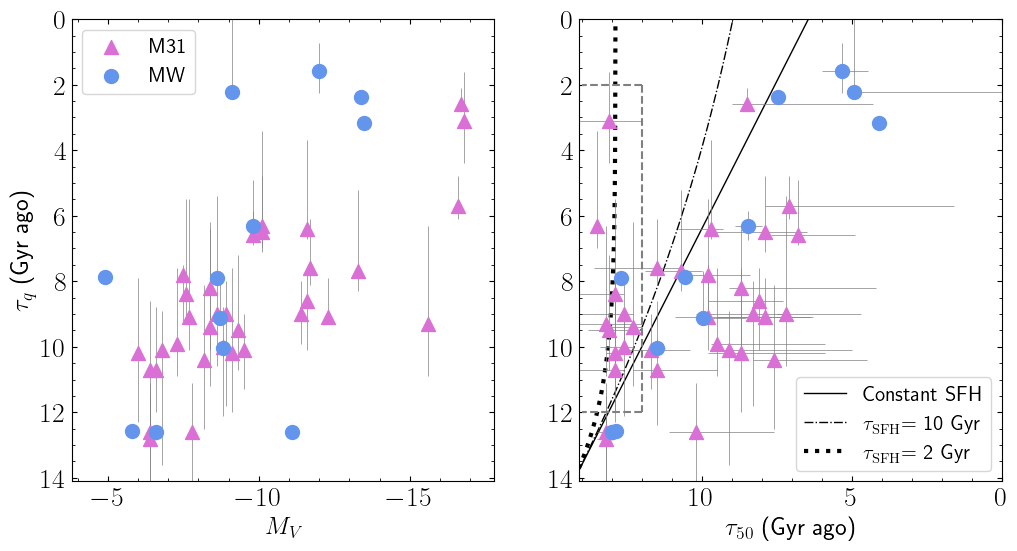

In [29]:
###------------------------------------------------
# Figure 5 - Star formation histories
###------------------------------------------------

# Read in the data

mag, rh, t50, t50h, t50l, t90, t90h, t90l, dhost = np.loadtxt('./M31_tSFH.dat', unpack=True,
                                                             usecols=(1,2,3,4,5,6,7,8,9))
mag_g, t50_g, t50h_g, t50l_g, t90_g, t90h_g, t90l_g = np.loadtxt('./MW_W15.txt', unpack=True,
                                               usecols = (1,2,3,4,5,6,7))



f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.set_xlim(-3.8,-17.8)

ax1.errorbar(mag,t90,yerr=[t90h,t90l], fmt = 'none', ecolor = '0.5', elinewidth=0.5,zorder=0)
ax1.errorbar(mag_g,t90_g,yerr=[t90h_g,t90l_g], fmt = 'none', ecolor = '0.5', elinewidth=0.5,zorder=0)

ax1.scatter(mag, t90,  c='orchid',marker='^',s=100, label = 'M31')
ax1.scatter(mag_g, t90_g,  c='cornflowerblue',marker='o',s=100, label = 'MW')
ax1.set_xlabel(r'$M_V$')
ax1.set_ylabel(r'$\tau_{q}$ (Gyr ago)')
ax1.set_ylim(14.1,0)
ax1.legend(loc='upper left')

x = np.arange(0.1,15,0.01)
y = 14.5-x*9/5
xp = 14.5-x

A10 = 0.5/(10*np.exp(-x/10)-10)
A2 = 0.5/(2*np.exp(-x/2)-2)
y10 = 14.5-(-10*np.log(1+0.9/(A10*10)))
y2 = 14.5-(-2*np.log(1+0.9/(A2*2)))


ax2.plot(xp, y, lw = 1, c = 'k', ls = '-', label = 'Constant SFH', zorder=0)
ax2.plot(xp, y10, lw = 1, c = 'k', ls = '-.', label = r'$\tau_{\rm SFH}$= 10 Gyr',zorder=0)
ax2.plot(xp, y2, lw = 3, c = 'k', ls = ':',label = r'$\tau_{\rm SFH}$= 2 Gyr',zorder=0)


ax2.errorbar(t50,t90,xerr=[t50h,t50l],yerr=[t90h,t90l], fmt = 'none', ecolor = '0.5', elinewidth=0.5,zorder = 0)
ax2.errorbar(t50_g,t90_g,xerr = [t50h_g,t50l_g],yerr=[t90h_g,t90l_g], fmt = 'none', ecolor = '0.5', elinewidth=0.5,zorder = 0)

ax2.scatter(t50, t90, c='orchid',marker='^',s=100)
ax2.scatter(t50_g, t90_g,  c='cornflowerblue',marker='o',s=100)

ax2.set_xlabel(r'$\tau_{50}$ (Gyr ago)')
ax2.set_ylim(14.1,0)
ax2.set_xlim(14.1,0)
ax2.legend(loc='lower right')

xbox = np.linspace(12,14,10)
yboxu = xbox*0+2
yboxd = xbox*0+12
ybox = np.linspace(2,12,12)
xboxu = ybox*0+12
ax2.plot(xbox,yboxu,ls = '--', c = '0.5')
ax2.plot(xbox,yboxd,ls = '--', c = '0.5')
ax2.plot(xboxu,ybox,ls = '--', c = '0.5')

plt.savefig('quenching_trends.pdf',bbox_inches='tight')

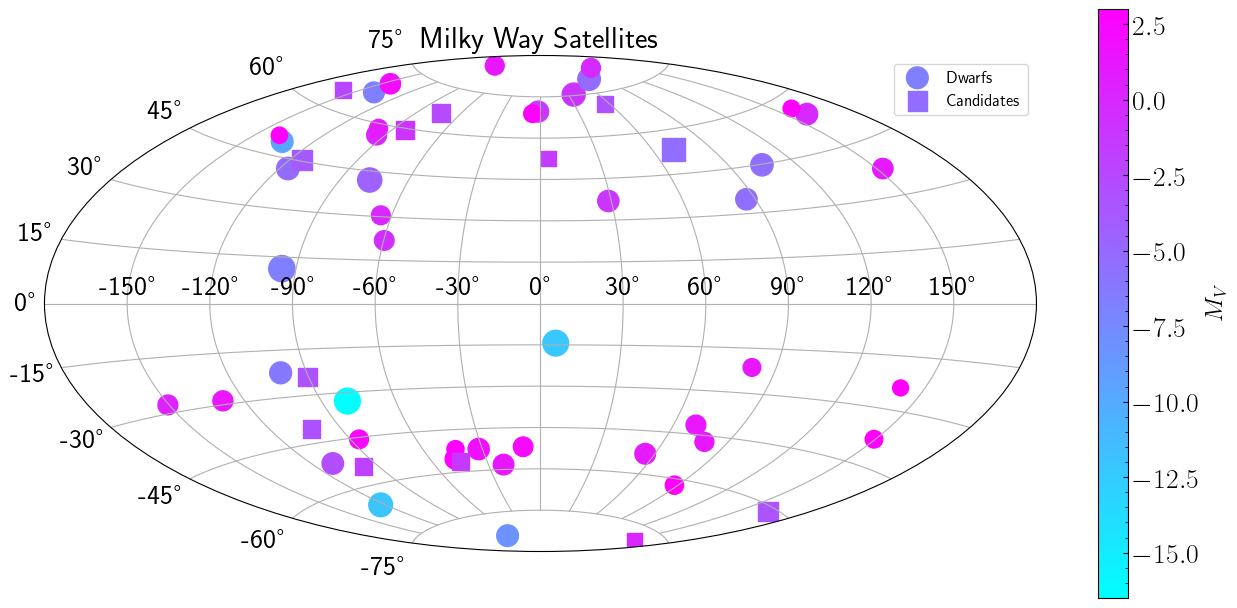

In [67]:
###------------------------------------------------
# Figure 6a - Milky Way Aitoff
###------------------------------------------------

plt.figure(figsize=(16,6.2))
plt.subplot(111, projection="aitoff")
plt.title("Milky Way Satellites")
plt.grid(True)

# Convert to galactocentric coordinates
coord_g = c_g.galactic
coord_gc = c_gc.galactic


l_rad_g = coord_g.l.wrap_at(180 * u.deg).radian
b_rad_g = coord_g.b.radian
l_rad_gc = coord_gc.l.wrap_at(180 * u.deg).radian
b_rad_gc = coord_gc.b.radian

plt.scatter(l_rad_g, b_rad_g, marker = 'o', s=np.log10(rh_g)*100, c = mv_g, cmap = 'cool',vmin = -16.5, vmax = -3, label = 'Dwarfs')
plt.scatter(l_rad_gc, b_rad_gc, marker = 's', s=np.log10(rh_gc)*100, c = mv_gc, cmap = 'cool',vmin = -16.5, vmax = 3, label = 'Candidates')
plt.subplots_adjust(top=0.95,bottom=0.0)
cbar =plt.colorbar()
cbar.set_label(r"$M_V$")
plt.legend(fontsize=12)

plt.savefig('MW_satellites_and_candidates_aitoff.pdf',bbox_inches='tight')

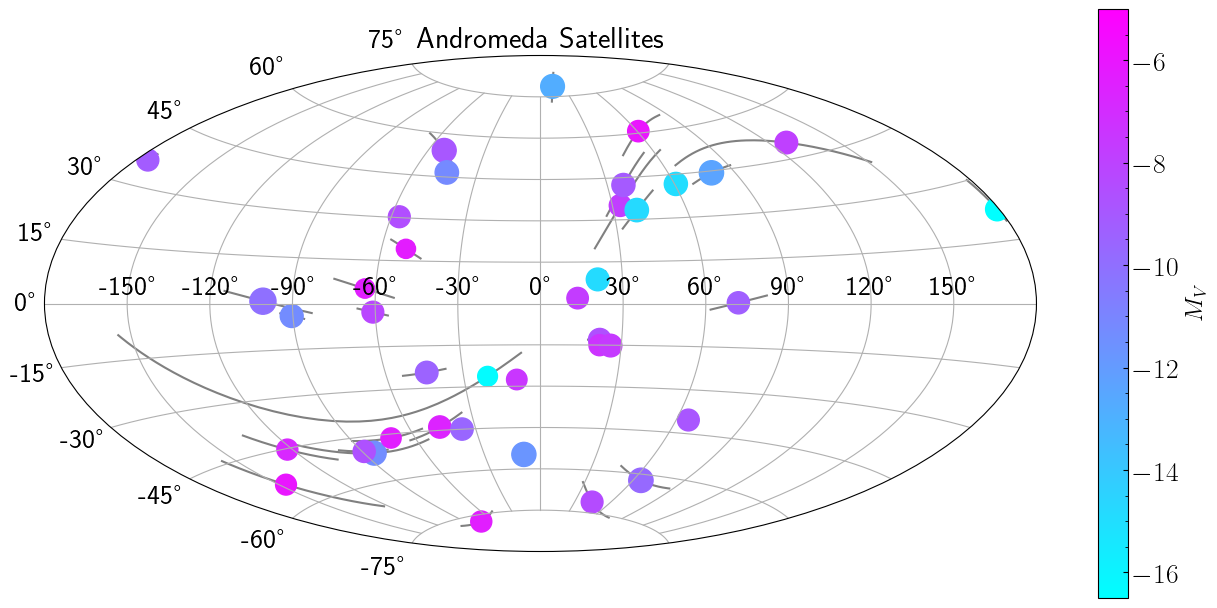

In [68]:
###------------------------------------------------
# Figure 6b - M31 Aitoff
###------------------------------------------------


### distance errors into Aitoff space
l_track = []
b_track = []
l_track_m33 = []
b_track_m33 = []

# Conn-style projection (RH)

m31_l = []
m31_b =[]
r_new = []

m33_l = []
m33_b =[]
r_new_m33 = []


# Track uncertainties (for distance errors)

for i in range(len(c_a)):
    test = m31_frame.radec2m31_conn(c_a[i],dist_m31[i]/1000)

    m31_l.append(test[0])
    m31_b.append(test[1])
    r_new.append(test[2])
    track = m31_frame.aitoff_error_conn(c_a[i],dist_m31[i]/1000, dist_m31_eu[i]/1000,dist_m31_ed[i]/1000)
    l_track.append(track[0])
    b_track.append(track[1])

for i in range(len(c_m33)):
    test = m31_frame.radec2m31_conn(c_m33[i],dist_m33[i]/1000)

    m33_l.append(test[0])
    m33_b.append(test[1])
    r_new_m33.append(test[2])
    track = m31_frame.aitoff_error_conn(c_m33[i],dist_m33[i]/1000, dist_m33_eu[i]/1000,dist_m33_ed[i]/1000)
    l_track_m33.append(track[0])
    b_track_m33.append(track[1])


    
coord_m31 = SkyCoord(np.array(m31_l) *u.deg, np.array(m31_b)*u.deg)
l_rad_a = coord_m31.ra.wrap_at(180 * u.deg).radian
b_rad_a = coord_m31.dec.radian

coord_m33 = SkyCoord(np.array(m33_l) *u.deg, np.array(m33_b)*u.deg)
l_rad_m33 = coord_m33.ra.wrap_at(180 * u.deg).radian
b_rad_m33 = coord_m33.dec.radian

# Plot

plt.figure(figsize=(16,6.2))
plt.subplot(111, projection="aitoff")
plt.title("Andromeda Satellites")
plt.grid(True)

for i in range(len(l_rad_a)):
    coord_track = SkyCoord(l_track[i] *u.deg, b_track[i] * u.deg)
    l_t = coord_track.ra.wrap_at(180 * u.deg).radian
    b_t = coord_track.dec.radian
    plt.plot(l_t, b_t, c = '0.5', zorder=0)

for i in range(len(l_rad_m33)):
    coord_track = SkyCoord(l_track_m33[i] *u.deg, b_track_m33[i] * u.deg)
    l_t = coord_track.ra.wrap_at(180 * u.deg).radian
    b_t = coord_track.dec.radian
    plt.plot(l_t, b_t, c = '0.5', zorder=0)

    
plt.scatter(l_rad_a, b_rad_a, marker = 'o', s=np.log10(rh_m31)*100, c = mv_m31, cmap = 'cool',vmin = -16.5, vmax = -5)
plt.scatter(l_rad_m33, b_rad_m33, marker = 'o', s=np.log10(rh_m33)*100, c = mv_m33, cmap = 'cool',vmin = -16.5, vmax = -5)
plt.subplots_adjust(top=0.95,bottom=0.0)
cbar =plt.colorbar()
cbar.set_label(r"$M_V$")

plt.savefig("m31_satellites_conn.pdf",bbox_inches='tight')

In [30]:
print(mv_g)

print(data_mw.name.values)

[ -9.73   -4.36   -2.5    -6.02   -2.94   -5.74   -8.73   -5.17   -9.43
  -5.574  -4.2    -4.29   -8.183  -8.867  -7.12   -4.7   -13.393  -4.13
  -3.5    -5.807  -5.1   -11.82   -9.72   -4.95   -4.4    -3.56  -18.077
  -4.17   -4.25   -4.28   -3.3   -13.5   -10.77   -1.3    -1.95   -8.72
  -1.3    -3.75   -3.     -1.1    -5.14   -4.42   -8.86   -2.53 ]
['Antlia II' 'Aquarius II' 'Aquarius III' 'Bootes I' 'Bootes II'
 'Bootes III' 'Bootes IV' 'Bootes V' 'Canes Venatici I'
 'Canes Venatici II' 'Carina' 'Carina II' 'Carina III' 'Centaurus I'
 'Cetus II' 'Cetus III' 'Columba I' 'Coma Berenices' 'Crater II' 'Draco'
 'Draco II' 'Eridanus II' 'Eridanus IV' 'Fornax' 'Grus I' 'Grus II'
 'Hercules' 'Horologium I' 'Horologium II' 'Hydra II' 'Hydrus I' 'Leo I'
 'Leo II' 'Leo IV' 'Leo V' 'Leo VI' 'Leo Minor I' 'LMC' 'Pegasus III'
 'Pegasus IV' 'Phoenix II' 'Pictor I' 'Pictor II' 'Pisces II'
 'Reticulum II' 'Reticulum III' 'Sagittarius' 'Sculptor' 'Segue 1'
 'Segue 2' 'Sextans' 'Sextans II' 'SMC' 'T